In [15]:
import pandas as pd
import numpy as np

# Use forward slashes
file_path = 'C:/Users/ak898//myexcel.xlsx'

# Load the dataset
data = pd.read_excel(file_path)

# Replace 'Height' column values with random integers between 150 and 180
data['Height'] = np.random.randint(150, 181, size=len(data))

# Display the first few rows to confirm changes
data.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,157,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,156,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,156,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,168,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,155,231,NaN,5000000.0


In [17]:
import numpy as np

# Replace 'Height' column values with random integers between 150 and 180
data['Height'] = np.random.randint(150, 181, size=len(data))

# Display the first few rows to confirm changes
data.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,152,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,162,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,160,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,178,231,NaN,5000000.0


Employee count by team:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage of employees by team:
 Team
New Orleans Pelicans      4.148472

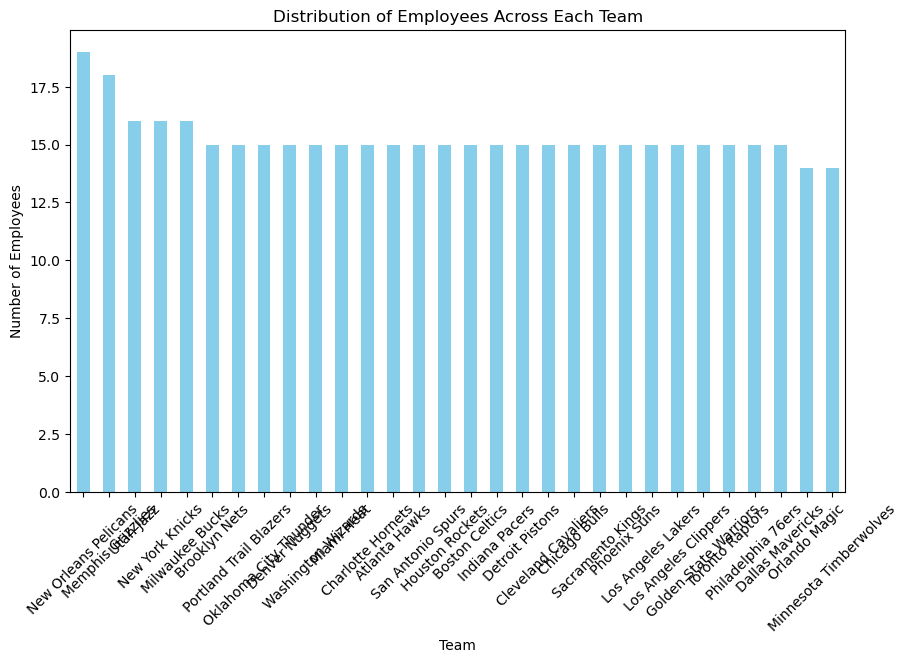

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame containing the employee dataset

# Calculate the count of employees in each team
team_counts = data['Team'].value_counts()

# Calculate the percentage of employees in each team relative to the total number of employees
team_percentage = (team_counts / len(data)) * 100

# Display team counts and percentages
print("Employee count by team:\n", team_counts)
print("\nPercentage of employees by team:\n", team_percentage)

# Plotting the distribution of employees across each team
plt.figure(figsize=(10, 6))
team_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees Across Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


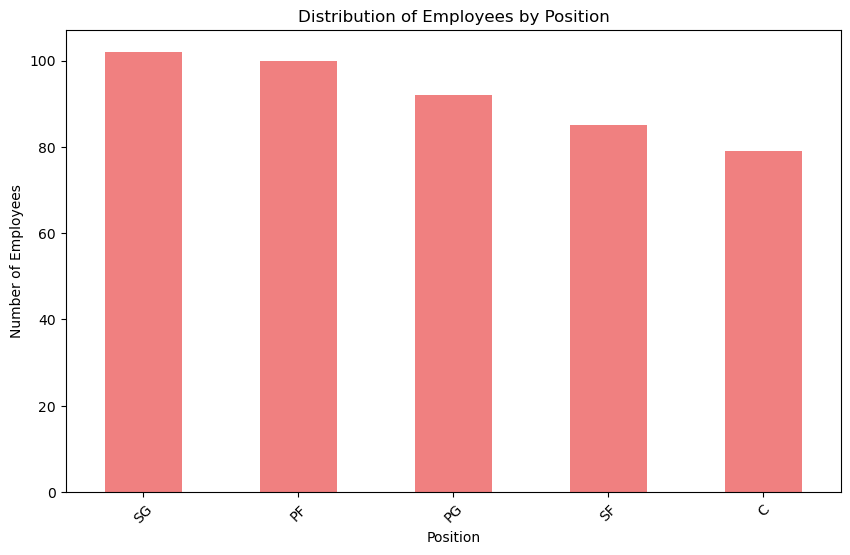

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [25]:
# Task 2: Segregate employees based on their positions
position_counts = data['Position'].value_counts()

# Plotting the distribution by position
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# Display position counts
position_counts


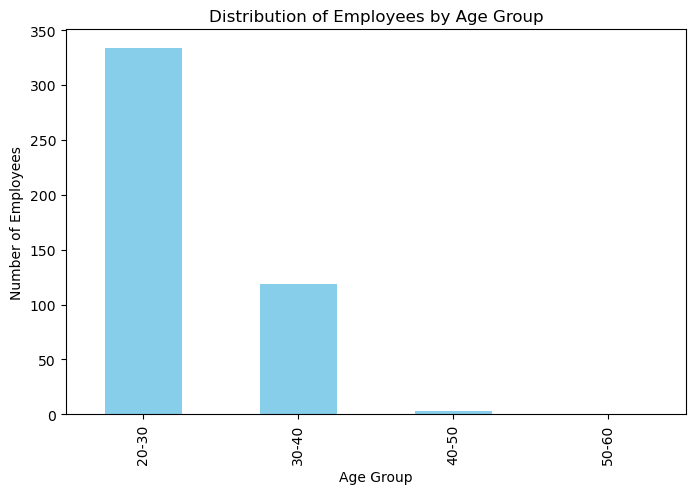

Age Group
20-30    334
30-40    119
40-50      3
50-60      0
Name: count, dtype: int64

In [27]:
# Task 3: Identify the predominant age group among employees
# Define age bins and labels
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']

# Create a new column 'Age Group' with age categories
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the distribution of age groups
age_group_counts = data['Age Group'].value_counts().sort_index()

# Plotting the distribution of age groups
plt.figure(figsize=(8, 5))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

# Display age group counts
age_group_counts


Team                   Position
Los Angeles Lakers     SF          31866445.0
Miami Heat             PF          31538671.0
Houston Rockets        SG          28122883.0
Phoenix Suns           PG          28002998.0
Denver Nuggets         SF          27982771.0
Cleveland Cavaliers    PF          27882029.0
New Orleans Pelicans   SG          27489643.0
Sacramento Kings       C           26950230.0
Oklahoma City Thunder  SF          25798862.0
Los Angeles Clippers   PG          25527217.0
Name: Salary, dtype: float64


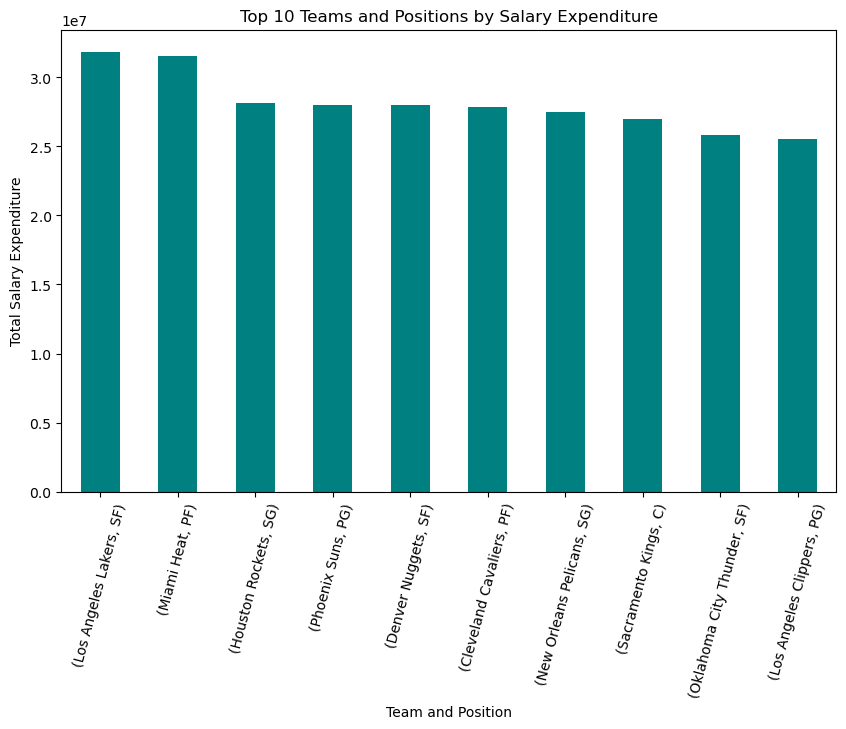

In [29]:
# Task 4: Determine the team and position with the highest salary expenditure
# Drop rows with missing salary data for accurate calculations
salary_data = data.dropna(subset=['Salary'])

# Group by 'Team' and 'Position' and calculate the total salary expenditure
salary_expenditure = salary_data.groupby(['Team', 'Position'])['Salary'].sum().sort_values(ascending=False)

# Display the top entries with the highest salary expenditure
top_salary_expenditure = salary_expenditure.head(10)
print(top_salary_expenditure)

# Plot the top salary expenditures by team and position
plt.figure(figsize=(10, 6))
top_salary_expenditure.plot(kind='bar', color='teal')
plt.title('Top 10 Teams and Positions by Salary Expenditure')
plt.xlabel('Team and Position')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=75)
plt.show()


Correlation between Age and Salary: 0.21400941226570955


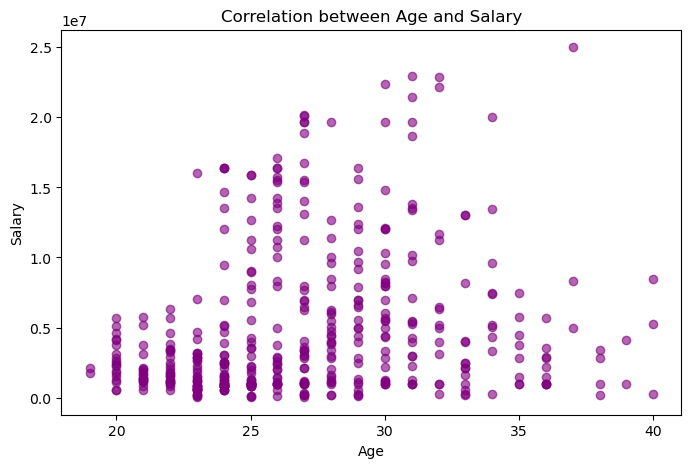

In [31]:
# Task 5: Investigate correlation between age and salary
# Drop rows with missing salary data for accurate correlation calculation
correlation_data = salary_data[['Age', 'Salary']]

# Calculate the correlation coefficient
correlation_coefficient = correlation_data.corr().iloc[0, 1]
print(f"Correlation between Age and Salary: {correlation_coefficient}")

# Plotting the correlation
plt.figure(figsize=(8, 5))
plt.scatter(correlation_data['Age'], correlation_data['Salary'], alpha=0.6, color='purple')
plt.title('Correlation between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
